## Job Generation

In [12]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Constant Parameters

In [13]:
# number of jobs
n = 10000
number_of_queues = 4
lmbda = 0.1
mu = 0.2
time_slice = 4.5

In [14]:
jobsArray = []

class Job:
    def __init__(self, arrival_time, service_time, priority):
        self.arrival_time = arrival_time
        self.service_time = service_time
        self.priority = priority
        self.sojourn_time = 0
        self.latency_due_to_preemption = 0
        self.waiting_time = 0
        self.pre_waiting_time = 0
        self.service_start_time = None
        self.service_end_time = None
        self.last_service_time = None
        self.isJobDone = False
        self.service_left = service_time
        

def generate_exponential_xi(n, lmbda):
    y = np.random.uniform(0, 1, n)
    x = [-np.log(1 - y[i]) / lmbda for i in range(len(y))]
    return x

def generate_si_sigma_xi(n):
    n_sorted = sorted(n)
    si_sigma_xi = []
    for i in range(len(n_sorted)):
        si_sigma_xi.append(sum(n_sorted[:i+1]))
    return si_sigma_xi

def generate_sizes(si_sigma_xi, mu):
    sizes = generate_exponential_xi(len(si_sigma_xi), mu)
    jobs = []
    for i in range(len(si_sigma_xi)):
        jobs.append(Job(si_sigma_xi[i], sizes[i], None))
    return jobs

def assign_priority(jobsArray, number_of_queues, average_service_time):
    bin_size = 2 * average_service_time / number_of_queues
    for job in jobsArray:
        priority = int(job.service_time / bin_size)
        if priority >= number_of_queues:
            priority = number_of_queues - 1
        job.priority = priority
    return jobsArray

def areJobsLeft(jobsArray):
    for job in jobsArray:
        if job.isJobDone == False:   
            return True
    return False

def getHighestPriorityJob(jobsArray,global_clock):
    index = -1
    priority = 100000
    for i, job in enumerate(jobsArray):
        if job.priority <= priority and global_clock >= job.arrival_time and job.isJobDone == False:
            priority = job.priority
            index = i 
            
    return index

def getNextJobArrival(jobsArray):
    index = -1
    for i, job in enumerate(jobsArray):
        if job.isJobDone == False:
            return i 
            
def simulate_queue(jobsArray,numJobs,time_slice):
    global_clock = 0
    numJobsdone = 0
    time_slice = time_slice
    while numJobsdone != numJobs:
        
        highest_priority_job_index = getHighestPriorityJob(jobsArray,global_clock)
        
        if highest_priority_job_index == -1:
            index =  getNextJobArrival(jobsArray)
            global_clock = jobsArray[index].arrival_time
            highest_priority_job_index = index

        currJob = jobsArray[highest_priority_job_index]  
        if currJob.service_start_time == None:
            jobsArray[highest_priority_job_index].service_start_time = global_clock
            jobsArray[highest_priority_job_index].pre_waiting_time = global_clock - currJob.arrival_time
        else:
            jobsArray[highest_priority_job_index].latency_due_to_preemption += global_clock - jobsArray[highest_priority_job_index].last_service_time
        
        if currJob.service_left > time_slice:
            global_clock += time_slice
            jobsArray[highest_priority_job_index].service_left -= time_slice
        else:
            global_clock += currJob.service_left
            jobsArray[highest_priority_job_index].isJobDone = True
            jobsArray[highest_priority_job_index].service_left = 0
            jobsArray[highest_priority_job_index].service_end_time = global_clock
            jobsArray[highest_priority_job_index].waiting_time = jobsArray[highest_priority_job_index].pre_waiting_time + jobsArray[highest_priority_job_index].latency_due_to_preemption
            jobsArray[highest_priority_job_index].sojourn_time = jobsArray[highest_priority_job_index].waiting_time + jobsArray[highest_priority_job_index].service_time
            numJobsdone += 1

        jobsArray[highest_priority_job_index].last_service_time = global_clock


## Queuing parameters

In [15]:

xi = generate_exponential_xi(n, lmbda)
si_sigma_xi = generate_si_sigma_xi(xi)
jobsArray = generate_sizes(si_sigma_xi, mu)
jobsArray = assign_priority(jobsArray, number_of_queues, 1/mu)    
# Count number of jobs in each queue
count = [0] * number_of_queues
for job in jobsArray:
    count[job.priority] += 1
print("Counts per priority:", count)

# Simulate the queue with the given arrival times and sizes using sjf
simulate_queue(jobsArray,n,time_slice)


Counts per priority: [3855, 2408, 1492, 2245]


In [16]:

print("Jobs:")
for job in jobsArray:
    print("Arrival Time:", job.arrival_time, "Service Time:", job.service_time, "Priority:", job.priority, "Waiting Time:", job.pre_waiting_time)


Jobs:
Arrival Time: 3.726233642706824e-05 Service Time: 13.697517457334468 Priority: 3 Waiting Time: 0.0
Arrival Time: 0.0009195590717964963 Service Time: 1.080236490354337 Priority: 0 Waiting Time: 382.5475268479262
Arrival Time: 0.0018619685550949382 Service Time: 5.988690630567813 Priority: 2 Waiting Time: 8710.173234659787
Arrival Time: 0.004550195415375528 Service Time: 10.583689927729658 Priority: 3 Waiting Time: 36357.03827767629
Arrival Time: 0.007976040112476164 Service Time: 4.228413540446267 Priority: 1 Waiting Time: 3206.6842328276753
Arrival Time: 0.011658883521268114 Service Time: 8.372427689049939 Priority: 3 Waiting Time: 36336.3771590302
Arrival Time: 0.01535318396125716 Service Time: 1.8237750430605744 Priority: 0 Waiting Time: 378.86223682224454
Arrival Time: 0.019382508608054648 Service Time: 5.1453734325187925 Priority: 2 Waiting Time: 8693.150862413502
Arrival Time: 0.023673880561217508 Service Time: 0.6663677249583545 Priority: 0 Waiting Time: 378.18754840068624


## Average Service Time for simulation

In [17]:

def getAverageServiceTime(jobsArray):
    totserviceTime = 0
    for job in jobsArray:
        totserviceTime += job.service_time
    avg_time = totserviceTime/len(jobsArray)
    return avg_time    

def getAverageWaitingTime(jobsArray):
    totWaitingTime = 0
    for job in jobsArray:
        totWaitingTime += job.pre_waiting_time+job.latency_due_to_preemption
    avg_time = totWaitingTime/len(jobsArray)
    return avg_time  

def getAverageSojournTime(jobsArray):
    totSojournTime = 0
    for job in jobsArray:
        totSojournTime += job.sojourn_time
    avg_time = totSojournTime/len(jobsArray)
    return avg_time 

print(getAverageServiceTime(jobsArray))
print(getAverageWaitingTime(jobsArray))
print(getAverageSojournTime(jobsArray))


5.037535443728517
2229.925899824384
2234.963435268118


## Response Time Vs Arrivals

[(3.726233642706824e-05, 0.0, 3), (0.0009195590717964963, 382.5475268479262, 0), (0.0018619685550949382, 8710.173234659787, 2), (0.004550195415375528, 36357.03827767629, 3), (0.007976040112476164, 3206.6842328276753, 1), (0.011658883521268114, 36336.3771590302, 3), (0.01535318396125716, 378.86223682224454, 0), (0.019382508608054648, 8693.150862413502, 2), (0.023673880561217508, 378.18754840068624, 0), (0.028430963743959287, 377.97818164075966, 0), (0.034061534914234824, 8671.411319160698, 2), (0.041070248274971174, 3202.7768900583915, 1), (0.048185842847883825, 36310.697355250224, 3), (0.05701254550587599, 8658.44528321944, 2), (0.06605348661767685, 36298.022248098896, 3), (0.07694148033398163, 8652.563801986438, 2), (0.08788761222585512, 36280.0710999897, 3), (0.10032626303531292, 3196.425436799135, 1), (0.11407911573227046, 376.6819246103402, 0), (0.12821662633247352, 3192.66587297532, 1), (0.14239020512101583, 3179.7193619302748, 1), (0.15696879452158602, 374.7995932620155, 0), (0.1

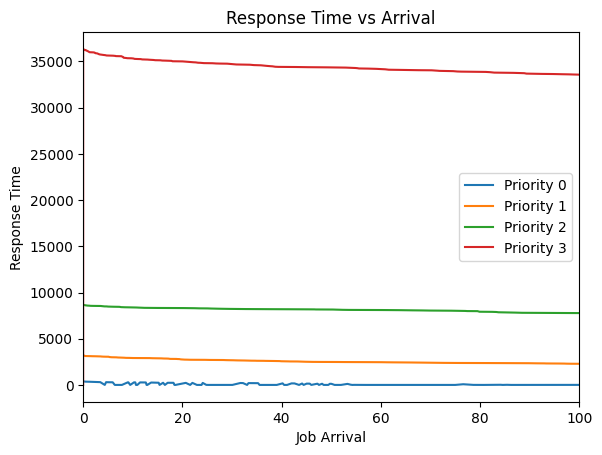

In [18]:
waitingTimesArray = []

for i, job in enumerate(jobsArray):
    waitingTimesArray.append((job.arrival_time,job.pre_waiting_time,job.priority))
    
print(waitingTimesArray)

priority_data = {}
for arrival_time, pre_waiting_time, priority in waitingTimesArray:
    if priority not in priority_data:
        priority_data[priority] = {'arrival_time': [], 'pre_waiting_time': []}
    priority_data[priority]['arrival_time'].append(arrival_time)
    priority_data[priority]['pre_waiting_time'].append(pre_waiting_time)

for priority in range(4):
    if priority in priority_data:
        data = priority_data[priority]
        plt.plot(data['arrival_time'], data['pre_waiting_time'], label=f'Priority {priority}')

plt.xlabel('Job Arrival')
plt.ylabel('Response Time')
# plt.ylim(0, 100)
plt.xlim(0, 100)
plt.title('Response Time vs Arrival')
plt.legend()
plt.show()

## Waiting Times Vs Arrival

[(3.726233642706824e-05, 36377.70590632171, 3), (0.0009195590717964963, 382.5475268479262, 0), (0.0018619685550949382, 8712.81499461946, 2), (0.004550195415375528, 36364.62932128156, 3), (0.007976040112476164, 3206.6842328276753, 1), (0.011658883521268114, 36348.658741299136, 3), (0.01535318396125716, 378.86223682224454, 0), (0.019382508608054648, 8705.010340687215, 2), (0.023673880561217508, 378.18754840068624, 0), (0.028430963743959287, 377.97818164075966, 0), (0.034061534914234824, 8687.651196855768, 2), (0.041070248274971174, 3202.7768900583915, 1), (0.048185842847883825, 36323.51720241854, 3), (0.05701254550587599, 8658.44528321944, 2), (0.06605348661767685, 36300.24180018606, 3), (0.07694148033398163, 8652.563801986438, 2), (0.08788761222585512, 36280.0710999897, 3), (0.10032626303531292, 3196.425436799135, 1), (0.11407911573227046, 376.6819246103402, 0), (0.12821662633247352, 3192.66587297532, 1), (0.14239020512101583, 3179.7193619302748, 1), (0.15696879452158602, 374.7995932620

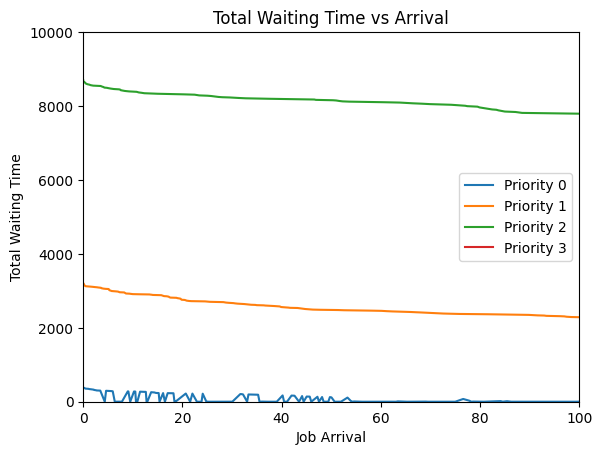

In [19]:
waitingTimesArray = []

for i, job in enumerate(jobsArray):
    waitingTimesArray.append((job.arrival_time,job.pre_waiting_time + job.latency_due_to_preemption ,job.priority))
    
print(waitingTimesArray)

priority_data = {}
for arrival_time, total_waiting_time, priority in waitingTimesArray:
    if priority not in priority_data:
        priority_data[priority] = {'arrival_time': [], 'total_waiting_time': []}
    priority_data[priority]['arrival_time'].append(arrival_time)
    priority_data[priority]['total_waiting_time'].append(total_waiting_time)

for priority in range(4):
    if priority in priority_data:
        data = priority_data[priority]
        plt.plot(data['arrival_time'], data['total_waiting_time'], label=f'Priority {priority}')

plt.xlabel('Job Arrival')
plt.ylabel('Total Waiting Time')
plt.ylim(0, 10000)
plt.xlim(0, 100)
plt.title('Total Waiting Time vs Arrival')
plt.legend()
plt.show()

## Latency Times Vs Arrival

[(3.726233642706824e-05, 36377.70590632171, 3), (0.0009195590717964963, 0, 0), (0.0018619685550949382, 2.6417599596734362, 2), (0.004550195415375528, 7.59104360526544, 3), (0.007976040112476164, 0, 1), (0.011658883521268114, 12.2815822689372, 3), (0.01535318396125716, 0, 0), (0.019382508608054648, 11.859478273712739, 2), (0.023673880561217508, 0, 0), (0.028430963743959287, 0, 0), (0.034061534914234824, 16.23987769507039, 2), (0.041070248274971174, 0, 1), (0.048185842847883825, 12.819847168313572, 3), (0.05701254550587599, 0.0, 2), (0.06605348661767685, 2.2195520871609915, 3), (0.07694148033398163, 0.0, 2), (0.08788761222585512, 0.0, 3), (0.10032626303531292, 0, 1), (0.11407911573227046, 0, 0), (0.12821662633247352, 0, 1), (0.14239020512101583, 0, 1), (0.15696879452158602, 0, 0), (0.17163591365356692, 0, 0), (0.18757103292397956, 0, 1), (0.20393146685370214, 0, 0), (0.22285939543491637, 9.608648141582307, 2), (0.24194024355593732, 0, 0), (0.2613808284008609, 0, 0), (0.2811953208934819, 

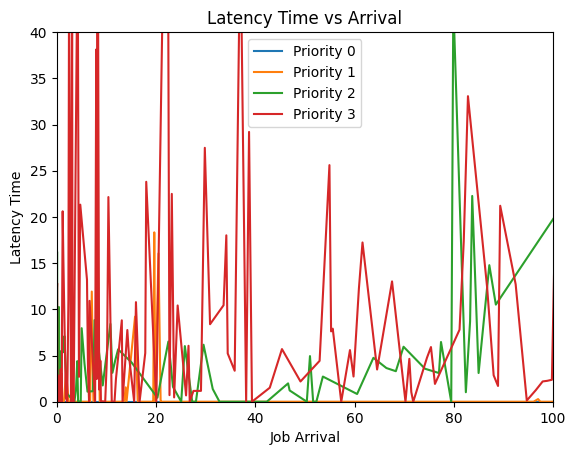

In [20]:
waitingTimesArray = []

for i, job in enumerate(jobsArray):
    waitingTimesArray.append((job.arrival_time,job.latency_due_to_preemption ,job.priority))
    
print(waitingTimesArray)

priority_data = {}
for arrival_time, latency_due_to_preemption, priority in waitingTimesArray:
    if priority not in priority_data:
        priority_data[priority] = {'arrival_time': [], 'latency_due_to_preemption': []}
    priority_data[priority]['arrival_time'].append(arrival_time)
    priority_data[priority]['latency_due_to_preemption'].append(latency_due_to_preemption)

for priority in range(4):
    if priority in priority_data:
        data = priority_data[priority]
        plt.plot(data['arrival_time'], data['latency_due_to_preemption'], label=f'Priority {priority}')



plt.xlabel('Job Arrival')
plt.ylabel('Latency Time')
plt.ylim(0, 40)
plt.xlim(0, 100)
plt.title('Latency Time vs Arrival')
plt.legend()
plt.show()